In [3]:
import pint.toa as toa
import pint.models as models
import matplotlib.pyplot as plt
import pint.residuals as res
import astropy.units as u
from pint.fitter import WlsFitter as wls
import astropy.constants as c 

In [2]:
%matplotlib inline

In [15]:
tim ='PINT/tests/datafile/J0613-0200_NANOGrav_dfg+12.tim'
par = 'PINT/tests/datafile/J0613-0200_NANOGrav_dfg+12_TAI_FB90.par'

In [23]:
less PINT/tests/datafile/J0613-0200_NANOGrav_dfg+12_TAI_FB90.par

In [16]:
t = toa.get_TOAs(timfile=tim,ephem='DE405') # not including DE405 makes the residuals be all fucky and different

INFO: Applying clock corrections. [pint.toa]
INFO: Observatory gbt, loading clock file /Users/Poop/.local/lib/python2.7/site-packages/pint-0.5.2+188.g956df46-py2.7-macosx-10.7-x86_64.egg/pint/datafiles/time.dat [pint.observatory.topo_obs]
INFO: Observatory gbt, loading GPS clock file /Users/Poop/.local/lib/python2.7/site-packages/pint-0.5.2+188.g956df46-py2.7-macosx-10.7-x86_64.egg/pint/datafiles/gps2utc.clk [pint.observatory.topo_obs]
INFO: Observatory gbt, loading BIPM clock file /Users/Poop/.local/lib/python2.7/site-packages/pint-0.5.2+188.g956df46-py2.7-macosx-10.7-x86_64.egg/pint/datafiles/tai2tt_bipm2015.clk [pint.observatory.topo_obs]
INFO: Getting IERS params and computing TDBs. [pint.toa]
INFO: Computing TDB columns. [pint.toa]
INFO: Computing observatory positions and velocities. [pint.toa]
INFO: Compute positions and velocities of observatories and Earth (planets = False), using DE405 ephemeris [pint.toa]
INFO: Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos [pint.toa]


In [13]:
t.table

index,mjd,mjd_float,error,freq,obs,flags,tdb,tdbld,ssb_obs_pos [3],ssb_obs_vel [3],obs_sun_pos [3]
,,d,us,MHz,,,,,km,km / s,km
int64,object,float64,float64,float64,str3,object,object,float128,float64,float64,float64
0,53679.5461991,53679.5461991,4.484,1340.0,gbt,"{'be': 'GASP', 'B': 'L', 'name': '53679.000008.1.000.000.tsum', 'tobs': 2343.151, 'format': 'Tempo2', 'clkcorr': <Quantity 2.6716306558566573e-05 s>, 'pta': 'NANOGrav', 'chanid': 'gasp_1340', 'bw': 4.0, 'fe': 'Rcvr1_2', 'proc': 'dfg+12'}",53679.5469419,53679.5469419,108808245.201 .. 40439431.1005,-20.9873373398 .. 8.60662313275,-108207151.113 .. -40345731.3662
1,53736.3881392,53736.3881392,5.786,1340.0,gbt,"{'be': 'GASP', 'B': 'L', 'name': '53736.000004.1.000.000.tsum', 'tobs': 1802.424, 'format': 'Tempo2', 'clkcorr': <Quantity 2.702439005122599e-05 s>, 'pta': 'NANOGrav', 'chanid': 'gasp_1340', 'bw': 4.0, 'fe': 'Rcvr1_2', 'proc': 'dfg+12'}",53736.3888936,53736.3888936,-26837247.33 .. 57608481.2855,-29.8886270284 .. -2.25033072861,27417352.8341 .. -57493332.151
2,53736.3881392,53736.3881392,4.965,1344.0,gbt,"{'be': 'GASP', 'B': 'L', 'name': '53736.000004.1.000.000.tsum', 'tobs': 1802.424, 'format': 'Tempo2', 'clkcorr': <Quantity 2.7024390051190895e-05 s>, 'pta': 'NANOGrav', 'chanid': 'gasp_1344', 'bw': 4.0, 'fe': 'Rcvr1_2', 'proc': 'dfg+12'}",53736.3888936,53736.3888936,-26837247.3135 .. 57608481.2867,-29.8886270429 .. -2.25033072727,27417352.8176 .. -57493332.1523
3,53679.546199,53679.546199,2.247,1348.0,gbt,"{'be': 'GASP', 'B': 'L', 'name': '53679.000008.1.000.000.tsum', 'tobs': 2343.151, 'format': 'Tempo2', 'clkcorr': <Quantity 2.6716306558462917e-05 s>, 'pta': 'NANOGrav', 'chanid': 'gasp_1348', 'bw': 4.0, 'fe': 'Rcvr1_2', 'proc': 'dfg+12'}",53679.5469419,53679.5469419,108808245.224 .. 40439431.0913,-20.987337362 .. 8.60662313453,-108207151.135 .. -40345731.357
4,53736.3881392,53736.3881392,2.117,1348.0,gbt,"{'be': 'GASP', 'B': 'L', 'name': '53736.000004.1.000.000.tsum', 'tobs': 1802.424, 'format': 'Tempo2', 'clkcorr': <Quantity 2.702439005115696e-05 s>, 'pta': 'NANOGrav', 'chanid': 'gasp_1348', 'bw': 4.0, 'fe': 'Rcvr1_2', 'proc': 'dfg+12'}",53736.3888936,53736.3888936,-26837247.2976 .. 57608481.2879,-29.8886270569 .. -2.25033072598,27417352.8017 .. -57493332.1535
5,53679.5461991,53679.5461991,2.592,1352.0,gbt,"{'be': 'GASP', 'B': 'L', 'name': '53679.000008.1.000.000.tsum', 'tobs': 2343.151, 'format': 'Tempo2', 'clkcorr': <Quantity 2.6716306558709102e-05 s>, 'pta': 'NANOGrav', 'chanid': 'gasp_1352', 'bw': 4.0, 'fe': 'Rcvr1_2', 'proc': 'dfg+12'}",53679.5469419,53679.5469419,108808245.171 .. 40439431.1131,-20.9873373092 .. 8.6066231303,-108207151.082 .. -40345731.3788
6,53736.3881392,53736.3881392,3.173,1352.0,gbt,"{'be': 'GASP', 'B': 'L', 'name': '53736.000004.1.000.000.tsum', 'tobs': 1802.424, 'format': 'Tempo2', 'clkcorr': <Quantity 2.7024390051318187e-05 s>, 'pta': 'NANOGrav', 'chanid': 'gasp_1352', 'bw': 4.0, 'fe': 'Rcvr1_2', 'proc': 'dfg+12'}",53736.3888937,53736.3888937,-26837247.3733 .. 57608481.2822,-29.8886269903 .. -2.25033073212,27417352.8774 .. -57493332.1478
7,53679.5461991,53679.5461991,8.093,1356.0,gbt,"{'be': 'GASP', 'B': 'L', 'name': '53679.000008.1.000.000.tsum', 'tobs': 2343.151, 'format': 'Tempo2', 'clkcorr': <Quantity 2.6716306558659415e-05 s>, 'pta': 'NANOGrav', 'chanid': 'gasp_1356', 'bw': 4.0, 'fe': 'Rcvr1_2', 'proc': 'dfg+12'}",53679.5469419,53679.5469419,108808245.181 .. 40439431.1087,-20.9873373199 .. 8.60662313115,-108207151.093 .. -40345731.3744


In [17]:
m = models.get_model(par)

In [22]:
m.components

{'AstrometryEquatorial': <pint.models.astrometry.AstrometryEquatorial at 0x1195344d0>,
 'BinaryELL1': <pint.models.binary_ell1.BinaryELL1 at 0x119534fd0>,
 'DispersionDMX': <pint.models.dispersion_model.DispersionDMX at 0x1196f3210>,
 'JumpDelay': <pint.models.jump.JumpDelay at 0x1196cf190>,
 'SolarSystemShapiro': <pint.models.solar_system_shapiro.SolarSystemShapiro at 0x119528790>,
 'Spindown': <pint.models.spindown.Spindown at 0x1196f3050>}

In [24]:
m.DelayComponent_list # models for delay

In [25]:
m.PhaseComponent_list # models for phase

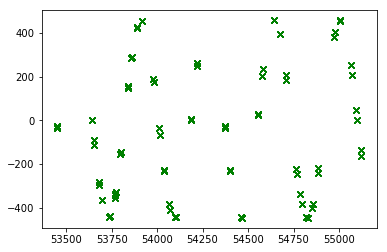

In [49]:
plt.plot(t.get_mjds(),m.delay(t.table),"gx") # delay in seconds

In [64]:
dmdelay=m.delay_funcs[3](t.table)
jump=m.delay_funcs[1](t.table)
astro=m.delay_funcs[0](t.table)
shapiro=m.delay_funcs[2](t.table)
binary=m.delay_funcs[4](t.table,None)

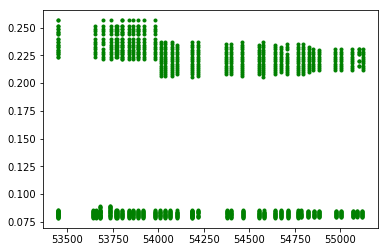

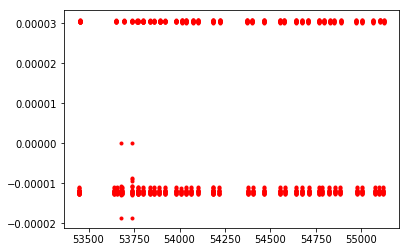

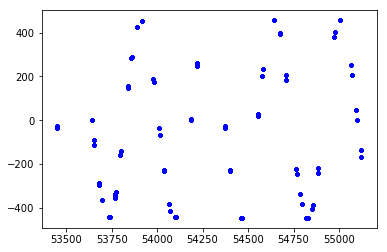

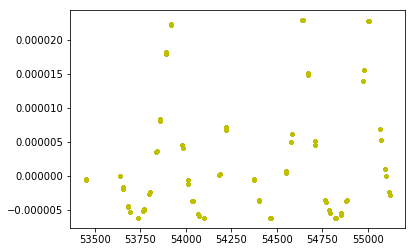

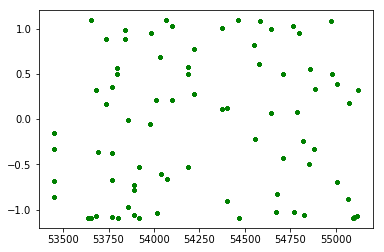

In [66]:
plt.plot(t.get_mjds(),dmdelay,"g.")
plt.show()
plt.plot(t.get_mjds(),jump,"r.")
plt.show()
plt.plot(t.get_mjds(),astro,'b.')
plt.show()
plt.plot(t.get_mjds(),shapiro,'y.')
plt.show()
plt.plot(t.get_mjds(),binary,'g.')

In [72]:
spindown=m.phase(t.table)

In [73]:
spindown

Phase(int=<Column name='tdbld' dtype='float128' length=1113>
-15252672984.0
-13648639087.0
-13648639087.0
-15252672984.0
-13648639087.0
-15252672983.0
-13648639086.0
-15252672983.0
-13648639086.0
-13648639086.0
-13648639086.0
-13648639086.0
           ...
 10046261179.0
 11875489647.0
 13761094690.0
 15393282906.0
 16209538660.0
 -5825195727.0
 -5206097687.0
 -4164795652.0
  -984964651.0
      -64235.0
  6838491384.0
 10046261180.0, frac=<Column name='tdbld' dtype='float128' length=1113>
 -0.30437993072
-0.298594903201
-0.301786321215
-0.302161723375
-0.302054050379
-0.302229061723
-0.302137450315
 -0.30247573182
-0.301785666496
-0.301786184311
-0.301786172204
-0.301786180586
            ...
-0.300444311462
-0.300863753073
-0.301933054812
-0.302357912995
-0.302537594922
-0.302549974993
-0.302267733961
-0.302308791317
-0.299584433436
-0.300780046731
-0.301654393785
-0.300581091084)

In [86]:
r=res.resids(t,m)

In [96]:
RES=r.time_resids

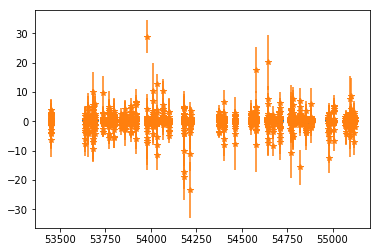

In [104]:
plt.plot(t.get_mjds(),r.time_resids,"*") # y axis is in seconds
plt.errorbar(t.get_mjds(),RES.to(u.us).value,yerr=t.get_errors(),fmt='*') # errors in TOAs in microseconds
plt.show()
# always check for correct units when generating error bars

In [108]:
fit=wls(t,m)

In [113]:
temp=fit.resids.time_resids

In [11]:
why = 4

In [12]:
why *= (c.G * u.solMass/c.c**3).to(u.second)
print why

1.97074435169e-05 s


In [166]:
fit.model.PMRA.value += 20*fit.model.PMRA.uncertainty_value # RA as a numerical value

<Container object of 3 artists>

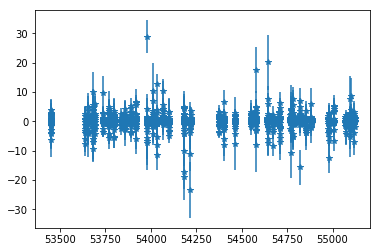

In [180]:
fit.update_resids()
temp=fit.resids.time_resids
plt.errorbar(t.get_mjds(),temp.to(u.us).value,yerr=t.get_errors(),fmt='*') # errors in TOAs in microseconds
# resids get worse because the RA changed 
# BUT they were changed back to normal with fit.reset_model()

In [159]:
fit.reset_model()

In [147]:
fit.model.RAJ.uncertainty_value

8.3315289370467500003e-06

In [169]:
fit.model.PMRA.uncertainty_value # proper motion in RA 

0.06420322529897886

In [168]:
fit.model.PMRA.value

3.1370636942509833

In [172]:
fit.set_fitparams('PMRA')

In [175]:
fit.get_fitparams()

{'PMRA': <pint.models.parameter.floatParameter at 0x11e939a10>}

In [178]:
fit.fit_toas() # this is the chi squared value for the residuals

1232.9947377170597935

In [179]:
fit.model.PMRA.value # this changed from ~ 3.13 

1.6934163076630897

In [182]:
fit.model_init.PMRA.value # note this is close to fit.model.PMRA.value

1.6924911250239592

In [19]:
m.RAJ.

6.2288820316111115